In [2]:
# lIBRARIES
import random, time
import numpy as np
import networkx as nx
from itertools import combinations


# DOAA

In [3]:
node = 8
student_number = 3
def Generate_Graph():
    graph=nx.generators.random_graphs.erdos_renyi_graph(n=node, p=0.6, seed=student_number, directed=False)

    nx.draw(graph, with_labels=True)
    
    return graph

In [4]:
def GetPotentialCovers(edges):
    """
    Return the possible covers for the graph.
    """
    edges = set(edges)
    powerset = ([x for i in range(len(edges)+1) for x in combinations(edges,i)])
    potential_covers = powerset[1:]

    return potential_covers

In [16]:
def ExhaustiveSearch(graph):
    """
    Steps:
        - Generate Powerset of the Edges.
        - 
    """
    potential_covers = GetPotentialCovers(graph.edges())

    minimum_edge_cover_size = np.inf
    minimum_edge_cover = None

    covers_sizes = []

    for potential_cover in potential_covers:
        
        # print(potential_cover)
        
        # get vertices of edges in the potential cover 
        cover_vertices = set()
        for edge in potential_cover:
            cover_vertices.add(edge[0])
            cover_vertices.add(edge[1])
        cover_vertices = list(cover_vertices)

        # construct a subcover to check sufficient condition
        sub_cover = set()
        for source, sink in graph.edges(cover_vertices):
            sub_cover.add(source)
            sub_cover.add(sink)

        # print(potential_cover, len(potential_cover))

        if sub_cover == set(graph.nodes()):
            if len(potential_cover) < minimum_edge_cover_size:
                minimum_edge_cover_size = len(potential_cover)
                minimum_edge_cover = potential_cover
        
    return f'The minimum edge cover: {minimum_edge_cover}, size: {minimum_edge_cover_size}'


The minimum edge cover: ((0, 6),), size: 1
it took 0.761185884475708 secs


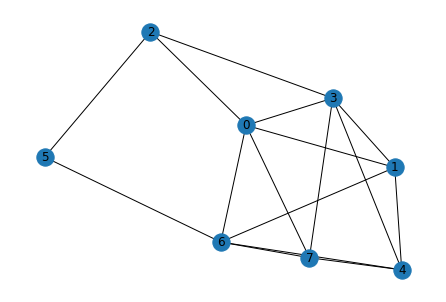

In [17]:
graph = Generate_Graph() # comment out not to generate new graph

start = time.time()
print(ExhaustiveSearch(graph=graph))
stop = time.time()
print('it took', stop-start, 'secs')

# AWAL

In [18]:
node = 15
student_number = 2
random.seed = student_number

def Generate_Graph():
    graph=nx.generators.random_graphs.erdos_renyi_graph(n=node, p=0.6, seed=student_number, directed=False)
    for _ in range(node):
        graph.nodes[_]['weight'] = random.randint(1,10)

    print(nx.get_node_attributes(graph,'weight'))
    nx.draw(graph, with_labels=True)

    return graph
    

In [19]:
def GetPotentialCovers(vertices):
    """
    Return the possible covers for the graph
    """
    vertices = set(vertices)
    powerset = ([x for i in range(len(vertices)+1) for x in combinations(vertices,i)])
    potential_covers = powerset[1:]

    return potential_covers

In [20]:

def ExhaustiveSearchAwal(graph=None):
    """
    Steps:
        - Generate Powerset of the vertices.
            -- potential cover must not empty
            -- potential cover must be weighted
        
        - Check if cover
            -- if edges of graph are connected to the vertices in the potential cover. all must connect to atleast one.
            -- compute the size for each cover and compare the minimum cover to update
    """
    potential_covers = GetPotentialCovers(graph.nodes())

    minimum_weighted_vertices_size = np.inf
    minimum_weight_vertices_cover = None

    for potential_cover in potential_covers:

        # check if potential cover is a cover
        # print(potential_cover)
        cover_vertices = set(potential_cover)

        # find subcover, check if subcover is complete for potential cover to be a cover
        sub_cover = []
        for vertex in potential_cover:
            
            # get all the neighbors
            neighbors = graph[vertex]

            # form an edge with neighbors 
            for n in neighbors:
                if (vertex, n) in sub_cover:
                    continue
                else:
                    sub_cover.append((n, vertex))

        # if subcover complete. Thus, potential cover is cover
        # check weight to obtain the minimum
        if len(set(sub_cover)) == len(set(graph.edges())):
            cover_size = 0
            cover = potential_cover
            graph_nodes = nx.get_node_attributes(graph,'weight')

            for node in graph_nodes:
                if node in cover:
                    cover_size += graph_nodes[node]

            # print(cover, ':', cover_size)

            if minimum_weighted_vertices_size > cover_size:
                minimum_weighted_vertices_size = cover_size
                minimum_weight_vertices_cover = cover


    return f'Minimum weighted cover : {minimum_weight_vertices_cover} size: {minimum_weighted_vertices_size}'


NameError: name 'ExhaustiveSearchAwal' is not defined

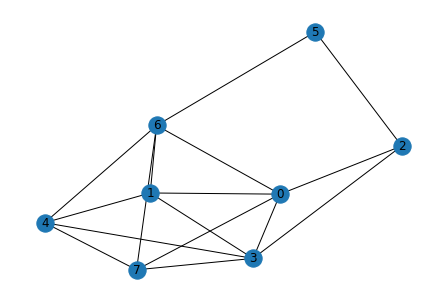

In [39]:
graph = Generate_Graph() # comment out not to generate new graph
start = time.time()
print(ExhaustiveSearchAwal(graph=graph))
stop = time.time()
print('it took', stop-start, 'secs')

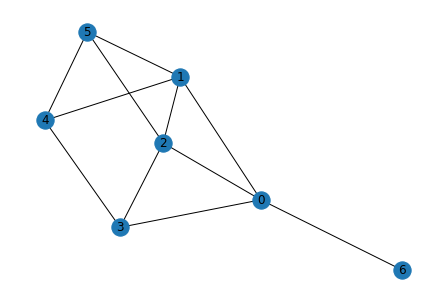

In [50]:
# VASCO
node = 7
student_number = 3
def Generate_Graph():
    graph=nx.generators.random_graphs.erdos_renyi_graph(n=node, p=0.6, seed=student_number, directed=False)

    nx.draw(graph, with_labels=True)
    
    return graph

def GetPotentialDomSets(edges):
    """
    Return the possible covers for the graph.
    """
    edges = set(edges)
    powerset = ([x for i in range(len(edges)+1) for x in combinations(edges,i)])
    potential_domsets = powerset[1:]

    return potential_domsets

graph = Generate_Graph()

In [51]:
pdomsets = GetPotentialDomSets(graph.edges()) #2^n-1
adjacency_matrix = nx.adjacency_matrix(graph).todense()

In [52]:
adjacency_matrix

matrix([[0, 1, 1, 1, 0, 0, 1],
        [1, 0, 1, 0, 1, 1, 0],
        [1, 1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [59]:
for pdomset in pdomsets: 
    for edge in pdomset:
        
        covered_vertices = set()

        for vertex in edge:
            neighbors = graph.edges(vertex)
            for source, sink in neighbors:
                covered_vertices.add(sink)
                covered_vertices.add(source)

        # pure neighbours of edge elements
        for u in edge:
            covered_vertices.remove(u)

        # an edge must not exist between neighbors of domset
        isDomset = set()
        for u in covered_vertices:
            if 

        print(edge)
        print(covered_vertices)
        print(covered_vertices==set(graph.nodes()))

    break

(0, 1)
{2, 3, 4, 5, 6}
False


In [19]:
[i in [1,3,4,2] for i in [1,2]]

AttributeError: 'list' object has no attribute 'any'